# Faster R-CNN Car recognition project

A quick application of what i learned with IMB's AI Engineer Certificate

In [1]:
# homemade functions for vizuals
from settings import get_predictions, draw_box, save_RAM, COCO_INSTANCE_CATEGORY_NAMES

# pytorch packages
import torchvision
from torchvision import  transforms 
import torch
from torch import no_grad

# image and number manipulation
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Model loading


For starters, we use a pre-trained model, ResNet50 <br>
Afterwards, we will try to create our own model. This is an angoing project in the same <br>
github repository

In [2]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False

c:\Users\paulo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\paulo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Optimization code

def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

## Object Localization


We're using the dataset that we will later use to train a model. <br>
Since right now we're using a pre-trained model, we can use whichever dataset (train or test).

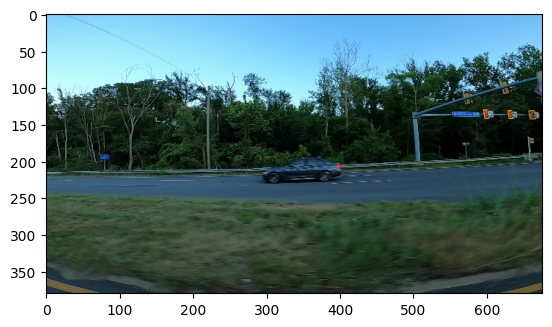

In [4]:
img_path='data/training_images/vid_4_600.jpg'
half = 0.5
image = Image.open(img_path)

image.resize( [int(half * s) for s in image.size] )

plt.imshow(image)
plt.show()

We will create a transform object to convert the image to a tensor.


In [5]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
pred = model([img])

In [6]:
print(pred[0]['labels'])
print(pred[0]['scores'])

tensor([ 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
tensor([0.9853, 0.9840, 0.9219, 0.8786, 0.8171, 0.6849, 0.5847, 0.5721, 0.5530,
        0.3323, 0.2794, 0.2610, 0.2030])


In [7]:
# label of the most confident prediction
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'car'

In [8]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[291.6531982421875, 195.18960571289062, 406.3925476074219, 230.87091064453125]

In [9]:
t,l,r,b=[round(x) for x in bounding_box]

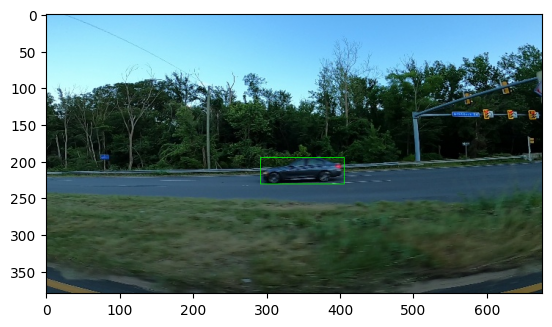

In [10]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8)
cv2.rectangle(img_plot,(t,l),(r,b),(0, 255, 0), 1) # Draw Rectangle with the coordinates
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

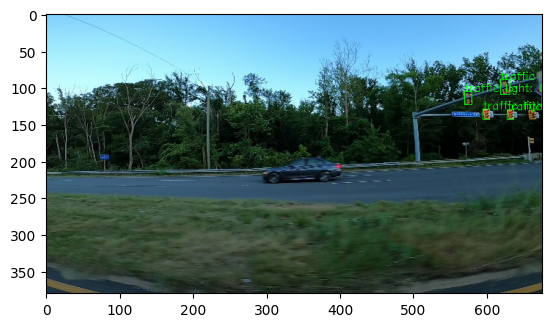

In [11]:
# the pre-trained model is trained on multiple objects, such as traffic lights
pred_obj=get_predictions(pred,objects="traffic light")
draw_box(pred_obj,img,rect_th= 1,text_size= 0.5,text_th=1)
del pred_obj

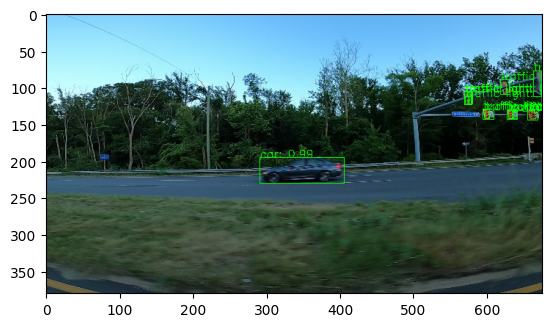

In [12]:
# Threshold manipulation
pred_thresh=get_predictions(pred,threshold=0.01)
draw_box(pred_thresh,img,rect_th= 1,text_size= 0.5,text_th=1)
del pred_thresh